In [12]:
import numpy as np
import torch
from torch import nn, optim
from torch.nn import functional as F
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
from torchvision.transforms import v2

from PIL import Image

import matplotlib.pyplot as plt

from torchinfo import summary


In [ ]:
rnn = nn.RNN(input_size=10, hidden_size=20, num_layers=1, batch_first=False)

x = torch.randn(3, 32, 10)
out, hidden = rnn(x)

print(out.shape, hidden.shape)

torch.Size([3, 32, 20]) torch.Size([1, 32, 20])


In [3]:
rnn = nn.RNN(input_size=10, hidden_size=20, num_layers=1, batch_first=True)

x = torch.randn(32, 3, 10)
out, hidden = rnn(x)

print(out.shape, hidden.shape)

torch.Size([32, 3, 20]) torch.Size([1, 32, 20])


In [4]:
out_last = out[:, -1, :]  # Get the last time step output
hidden_last = hidden[-1]
print(torch.allclose(out_last, hidden_last))  # Should be True

True


In [5]:
print(out_last[-1])
print(hidden_last[-1])

tensor([ 0.0939,  0.7872, -0.7008, -0.3951,  0.4085,  0.4311,  0.3210, -0.1438,
        -0.4909,  0.5900,  0.0494, -0.3277, -0.5909, -0.2995,  0.2468,  0.2111,
        -0.2791, -0.2335, -0.0132,  0.2053], grad_fn=<SelectBackward0>)
tensor([ 0.0939,  0.7872, -0.7008, -0.3951,  0.4085,  0.4311,  0.3210, -0.1438,
        -0.4909,  0.5900,  0.0494, -0.3277, -0.5909, -0.2995,  0.2468,  0.2111,
        -0.2791, -0.2335, -0.0132,  0.2053], grad_fn=<SelectBackward0>)


In [6]:
lstm = nn.LSTM(input_size=10, hidden_size=20, num_layers=1, batch_first=True)
x = torch.randn(32,3,10)
out, (hidden, cell) = lstm(x)
print(out.shape, hidden.shape, cell.shape)


torch.Size([32, 3, 20]) torch.Size([1, 32, 20]) torch.Size([1, 32, 20])


In [7]:
out[-1, :,:]

tensor([[ 0.0904,  0.0193, -0.0493,  0.0370, -0.1629,  0.1309,  0.0156,  0.2283,
          0.2143, -0.0040, -0.0801, -0.0344, -0.0915,  0.1069,  0.1156, -0.1141,
          0.1499, -0.0645,  0.0840, -0.0226],
        [ 0.0322, -0.1059,  0.1705,  0.1257, -0.1285,  0.1540, -0.0481,  0.0003,
          0.0515,  0.0487, -0.1499, -0.0858, -0.1869,  0.0222,  0.0863, -0.1399,
          0.1868, -0.1216,  0.0327, -0.0914],
        [ 0.1315,  0.0098, -0.0601,  0.1148, -0.2008,  0.1883, -0.0483,  0.1186,
          0.1564,  0.0609, -0.0256, -0.1540, -0.1374,  0.1234,  0.1314, -0.0873,
          0.1091, -0.1611,  0.0008, -0.0731]], grad_fn=<SliceBackward0>)

In [8]:
hidden[:,-1,:]

tensor([[ 0.1315,  0.0098, -0.0601,  0.1148, -0.2008,  0.1883, -0.0483,  0.1186,
          0.1564,  0.0609, -0.0256, -0.1540, -0.1374,  0.1234,  0.1314, -0.0873,
          0.1091, -0.1611,  0.0008, -0.0731]], grad_fn=<SliceBackward0>)

In [9]:
cell[:,-1,:]

tensor([[ 0.2540,  0.0212, -0.0964,  0.2643, -0.3800,  0.5369, -0.1396,  0.1725,
          0.2908,  0.1368, -0.0634, -0.2500, -0.4520,  0.1724,  0.3196, -0.2032,
          0.2352, -0.3944,  0.0013, -0.1200]], grad_fn=<SliceBackward0>)

In [10]:
gru = nn.GRU(input_size=10, hidden_size=20, num_layers=2, batch_first=True)
x = torch.randn(5,3,10)
out, hidden = gru(x)
print(out.shape, hidden.shape)

torch.Size([5, 3, 20]) torch.Size([2, 5, 20])


In [11]:
print(hidden[:,-1,:])

tensor([[ 0.1024,  0.2718, -0.1568, -0.2061, -0.1207,  0.3981,  0.2115,  0.0391,
         -0.3101,  0.4197, -0.0895, -0.0358,  0.4099,  0.3398,  0.2062, -0.3869,
         -0.2293,  0.0187, -0.1564,  0.4802],
        [-0.0506,  0.0788, -0.1744, -0.1275, -0.1680,  0.2440, -0.0598,  0.1616,
          0.0120,  0.2894, -0.0269,  0.1491, -0.0182, -0.1256,  0.0316, -0.1417,
          0.1652, -0.1238,  0.1126,  0.0587]], grad_fn=<SliceBackward0>)


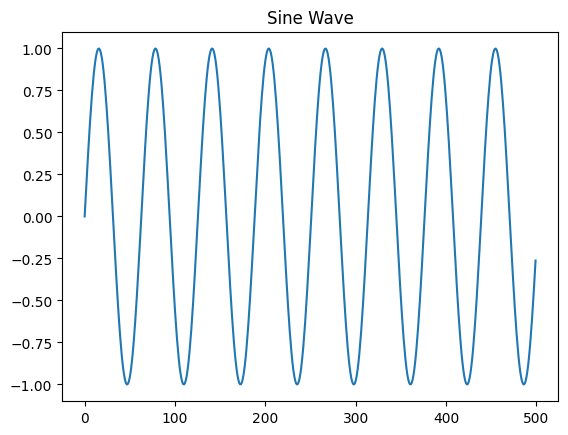

In [13]:
def gen_sine_wave(seq_len, num_samples):
  x = np.linspace(0,seq_len, num_samples)
  y = np.sin(x)
  return(y)

data = gen_sine_wave(seq_len=50, num_samples=500)
plt.plot(data)
plt.title('Sine Wave')
plt.show()

In [14]:
def create_sequences(data, seq_len):
  sequences = [] # 입력데이터 시퀀스를 저장
  labels =[] # 정답 값을 저장

  for i in range(len(data)-seq_len):
      sequences.append(data[i : i+seq_len]) # seq_len 만큼 데이터를 입력으로 사용
      labels.append(data[i+seq_len])  # 해당 시퀀스의 바로 다음 값을 정답으로 설정

  sequences = torch.tensor(np.array(sequences), dtype=torch.float32).unsqueeze(-1)
  labels = torch.tensor(np.array(labels), dtype=torch.float32)

  return sequences, labels

seq_len = 50
X, y = create_sequences(data, seq_len)
print(X.size())
print(y.size())

torch.Size([450, 50, 1])
torch.Size([450])


In [16]:
input_size = 1
hidden_size = 20
num_layer = 1


class RNNModel(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers):
    super().__init__()
    self.rnn = nn.RNN(input_size=input_size,
                      hidden_size=hidden_size,  # 입출력과 상관없는 크기
                      num_layers=num_layers,
                      batch_first=True)
    self.fc = nn.Linear(hidden_size, 1)

  def forward(self, x):
    out, _ = self.rnn(x) # out : [450, 50, 20]
    ht = out[:, -1 : ]   # ht :  [450, 20]
    return self.fc(ht)


In [17]:
seq_len = 50
num_samples = 500
data = gen_sine_wave(seq_len=seq_len, num_samples=num_samples)
X, y = create_sequences(data=data, seq_len=seq_len)

In [18]:
input_size = 1
hidden_size = 20
num_layer = 1
model = RNNModel(input_size=input_size,
                 hidden_size=hidden_size,
                 num_layers=num_layer)

---

### 🧠 요약

| 단계 | 구성 요소         | 입력 텐서       | 출력 텐서       |
|------|------------------|------------------|------------------|
| 입력 | 시계열 데이터     | `[450, 50, 1]`   | -                |
| RNN Layer 1 | `nn.RNN(1, 20)` | `[450, 50, 1]`   | `[450, 50, 20]`  |
| RNN Layer 2 | `num_layers=2`  | `[450, 50, 20]`  | `[450, 50, 20]`  |
| 마지막 상태 선택 | `out[:, -1, :]` | `[450, 50, 20]`  | `[450, 20]`      |
| 출력층 | `Linear(20 → 1)` | `[450, 20]`      | `[450, 1]`       |

---

### 🔍 설명

- **배치 크기 450**: 450개의 독립된 시계열 샘플을 병렬 처리.
- **시퀀스 길이 50**: 각 시계열은 50개의 time step으로 구성됨.
- **입력 차원 1**: 단변량 시계열 (예: 온도, 주가 등).
- **RNN Layer**: 두 개의 계층으로 구성되어 시퀀스 정보를 단계적으로 추출.
- **Linear Layer**: 마지막 time step의 출력을 받아 스칼라 값으로 매핑.

---

In [19]:
loss_fn = nn.MSELoss()
opt = torch.optim.Adam(model.parameters(), lr=0.001)

In [23]:
epochs = 100
for epoch in range(epochs):
  opt.zero_grad()
  outputs = model(X)

#   print(outputs.size(), y.size())

  loss = loss_fn(outputs.squeeze(), y)
  loss.backward()
  opt.step()
  if (epoch+1) % 10 == 0:
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 0.0027
Epoch [20/100], Loss: 0.0019
Epoch [30/100], Loss: 0.0015
Epoch [40/100], Loss: 0.0012
Epoch [50/100], Loss: 0.0010
Epoch [60/100], Loss: 0.0009
Epoch [70/100], Loss: 0.0008
Epoch [80/100], Loss: 0.0008
Epoch [90/100], Loss: 0.0007
Epoch [100/100], Loss: 0.0006


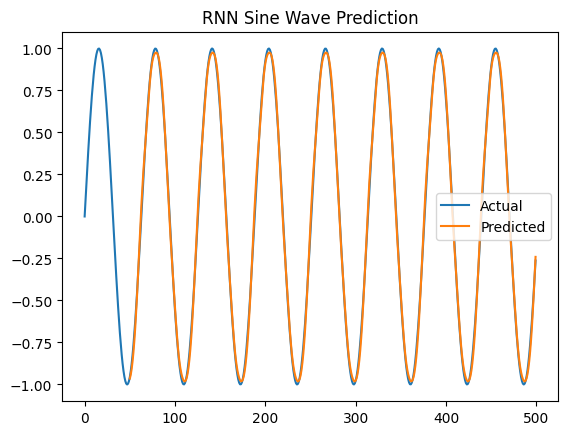

In [26]:
model.eval()
with torch.no_grad():
	pred = model(X).numpy()
plt.plot(data, label='Actual')
plt.plot(range(seq_len, seq_len + len(pred.squeeze())), pred.squeeze(), label='Predicted')
plt.legend()
plt.title('RNN Sine Wave Prediction')
plt.show()